# Table of Contents
1. [Introduction](#Introduction)
   - [Stakeholders and Motivation](#Stakeholders-and-Motivation)
   - [Research Questions](#Research-Questions)
   - [Goals](#Goals)
   - [Dataset Overview](#Dataset-Overview)
2. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-EDA)
   - [Descriptive Statistics](#Descriptive-Statistics)
   - [Visualizing Relationships](#Visualizing-Relationships)
3. [Data Preprocessing](#Data-Preprocessing)
   - [Handling Missing Values](#Handling-Missing-Values)
   - [Feature Encoding](#Feature-Encoding)
   - [Feature Scaling](#Feature-Scaling)
4. [Model Training and Evaluation](#Model-Training-and-Evaluation)
   - [Linear Regression](#Linear-Regression)
   - [Decision Tree](#Decision-Tree)
   - [Random Forest](#Random-Forest)
   - [XGBoost](#XGBoost)
5. [Results and Insights](#Results-and-Insights)
6. [Ethical Considerations](#Ethical-Considerations)
7. [Reflection and Learning](#Reflection-and-Learning)


# 1: Introduction

## 1.1: Stakeholders and Motivation

This project uses the Medical Cost personal Dataset to analyze healthcare expenses and discover the relationships between individual features and medical charges. The reflection from this study is valuble for mulitple stakeholders
1. **Insurance Companies:** Like every other business, Insuarance companies want to avoid any potentiol financial risks. Therefore, having accurate machine learning models to predict medical charges for setting fair premiums is a must in nowadays. 
3. **Healthcare Policymakers:** Studies like this can help policymakers to understand the financial impact of certain factors like smoking, BMI in order to make certain targeted systems/processes. 
4. **Individuals:** This study can help individuals to understand how certain lifestyle choices and demographic factors can influance their medical costs. Therefore, this can help individuals make well informed decisions.
<br><br>

### **Research Questions**
1. Which machine learning model provides the best balance of accuracy, interpretability, and efficiency for predicting medical charges: Linear Regression, Decision Tree, Random Forest, or XGBoost?
2. How does smoking status impact medical charges compared to other factors?
<br><br>

#### **Reasons for these Research question selection.**

**Question 1.1:** Why compare these four machine learning models?


| ML Model         | Reasons                                                                                                                                                                                                                   |
|-------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Linear Regression | Chosen as a baseline model due to its simploicoity, interpretability and to understand any linear relationships before applying more complex models. Furthure, it's widely used in healthcare sector                             |
| Decision Tree     | This can capture non-linear relationships and interactions between features. This can be ideal for variables like BMI and smoking may have non-linear impacts on charges. Often known for easiness of visual representations, which is crucial for explaining certain findings to non-technical stakeholders. |
| Random Forest     | This is a ensemble learning method that combines multiple decision trees and it can improve performance metrics while reducing overfitting. Also, its feature importance metric allows to interpret which factors are most influancial |
| XGBoost           | This is known for its high accuracy and efficiency. XGBoost is a state-of-the aft boosting algorithm widely used in real world applications.                                                                               |


<br><br>
**Question 1.2:** Why not Nueral Network, Support vector Machines, Gradient Boosting Variants, and k-Nearest Neighbors?


| ML Model                          | Reasons for not using them                                                                                                                                                                                                                   |
|-----------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Neural Networks                   | Neural networks are powerful but can be unstable for this dataset as: Dataset size: It’s relatively small (~1300 records), which limits the potential of neural networks that usually performs best of large datasets. Interpretability: It can be difficult to explain predictions to stakeholders. Cost: The added complexity and resource requirements aren’t suitable for the dataset’s size and simplicity. |
| Support Vector Machines (SVMs)    | SVMs are good for classification tasks but less commonly used for regression due to: Interpretability: Like neural networks, SVMs lack transparency and it’s a must to gain the trust of stakeholders. Hyperparameter Sensitivity: SVMs need extensive tuning, this can be an issue as added workload, complexity without proportional performance gain compared to models like Random Forest or XGBoost. |
| Gradient Boosting Variants (CatBoost, LightGBM) | These algorithms are strong competitors to XGBoost, however: Redundancy: There’s no need to include all gradient boosting variants since XGBoost already covers this category effectively. Stakeholder Familiarity: XGBoost is widely recognized in both research and industry. Therefore, it makes an ideal choice for this study. |
| k-Nearest Neighbors (k-NN)        | k-NN is simple but not suitable for this project due to: Performance: It often struggles with high-dimensional datasets. Also, it’s sensitive to irrelevant/redundant features. Interpretability: The limitations of feature importance analysis make it less useful when it comes to understanding key factors of medical charges. |



**Question 2:** Reasons for the second question?

- **Obvious Relevence:** This question is a natural choice for analysis as smoking is a well-known factor linked to health costs (Fishman et al., 2003). Most stakeholders can easily understand its importance.
- **Stakeholder Alignment:** This question directly aligns with the interests of stakeholders:
  -  Insurance companies need to understad how smoking can impact premiums.
  -  Policimakers can design targeted and effective interventions so they can reduce smoking related costs. 


## 1.2: Dataset Overview

The dataset contains the following features
- age: Age of the individual.
- sex: Gender of the individual (male/female).
- bmi: Body Mass Index, indicating the individual's health condition.
- children: Number of dependents covered by insurance.
- smoker: Smoking status of the individual (yes/no).
- region: Geographic region of residence (northeast, southeast, southwest, northwest).
- charges: Medical charges billed to the individual (target variable).
This dataset provides a mix of numerical and categorical features.

## 1.3: Performance Metrics

The following metrics will be used to evaluate and compare the selected machine learning models.

- Root Mean Squared Error (RMSE)
- R² (Coefficient of Determination)
- Mean Absolute Error (MAE)
- Training and Prediction Time

# 2: Exploratory Data Analysis (EDA)

## 2.1: Importing libraries 

In [321]:
# importing libraries for data manipulation and analysis
import pandas as pd
import numpy as np

#Importing libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# importing crucial libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# using warnings library for a clearner output
import warnings
warnings.filterwarnings('ignore')

Decided to install all the libraries upfront to avoid any potentiol problems while running the notebook. ix of numerical and categorical features.

## 2.2: Data Summarization

### Basic info and first view of the dataset

In [326]:
# loading the adapted insuarance dataset
df = pd.read_csv('insurance-adapted.csv')

# Display basic structure
# Overview of columns, types, and non-null counts
print(df.info())  
print("\n" + "="*65)
 # First 5 rows of the data table
print(df.head()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1318 non-null   float64
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB
None

    age     sex     bmi  children smoker     region      charges
0  19.0  female  27.900         0    yes  southwest  16884.92400
1  18.0    male  33.770         1     no  southeast   1725.55230
2  28.0    male  33.000         3     no  southeast   4449.46200
3  33.0    male  22.705         0     no  northwest  21984.47061
4  32.0    male  28.880         0     no  northwest   3866.85520


### **Dataset Structure**
- **Rows and Columns**:The dataset contains `1338 rows` and `7 columns`..
- **Column Descriptions**:
  - `age`: Age of the individual.
  - `sex`: Gender of the individual (`male`/`female`).
  - `bmi`: Body Mass Index, indicating the individual's health condition.
  - `children`: Number of dependents covered by insurance.
  - `smoker`: Smoking status of the individual (`yes`/`no`).
  - `region`: Geographic region of residence (`northeast`, `southeast`, `southwest`, `northwest`).
  - `charges`: Medical charges billed to the individual (target variable).


### Basic statistics of the dataset

In [330]:
# Displaying Summary Statistics
print("\n" + "="*40)
print("      Summary Statistics (Numerical Columns)      ")
print("="*40)
print(df.describe().to_string())

# Displaying value counts for categorical columns
print("\n" + "="*40)
print("      Value Counts for Categorical Columns      ")
print("="*40)

print("\nSex Distribution:")
print("-" * 20)
print(df['sex'].value_counts().to_string())

print("\nSmoker Distribution:")
print("-" * 20)
print(df['smoker'].value_counts().to_string())

print("\nRegion Distribution:")
print("-" * 20)
print(df['region'].value_counts().to_string())



      Summary Statistics (Numerical Columns)      
               age          bmi     children       charges
count  1318.000000  1338.000000  1338.000000   1338.000000
mean     39.216237    30.663397     1.094918  13270.422265
std      14.083151     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      26.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

      Value Counts for Categorical Columns      

Sex Distribution:
--------------------
sex
male      676
female    662

Smoker Distribution:
--------------------
smoker
no     1064
yes     274

Region Distribution:
--------------------
region
southeast    364
southwest    325
northwest    325
northeast    324


## 2.3: Missing Data Identification and Treatment

In [333]:
# Checking for missing values
print("Missing Values in Dataset:")
print(df.isnull().sum())

Missing Values in Dataset:
age         20
sex          0
bmi          0
children     0
smoker       0
region       0
charges      0
dtype: int64


- **Missing values**:
  - Total missing values in each column:
    - `age`: 0 missing values
    - `sex`: 0 missing values
    - `bmi`: 0 missing values
    - `children`: 0 missing values
    - `smoker`: 0 missing values
    - `region`: 0 missing values
    - `charges`: 0 missing values
- **Conclusion**: No missing data detected in the dataset.

**Since there are no any missing values present in the dataset, no need for missing values treatment!**

## 2.3: Encode Categorical Data

In [337]:
# performing One-hot encoding for 'region'
data_encoded = pd.get_dummies(df, columns=['region'], drop_first=True)

# Encoding 'sex' and 'smoker'
data_encoded['sex'] = data_encoded['sex'].map({'female': 0, 'male': 1})
data_encoded['smoker'] = data_encoded['smoker'].map({'no': 0, 'yes': 1})

# Displaying the first few rows of the transformed dataset
print("\nTransformed Dataset (Head):")
print(data_encoded.head())



Transformed Dataset (Head):
    age  sex     bmi  children  smoker      charges  region_northwest  \
0  19.0    0  27.900         0       1  16884.92400             False   
1  18.0    1  33.770         1       0   1725.55230             False   
2  28.0    1  33.000         3       0   4449.46200             False   
3  33.0    1  22.705         0       0  21984.47061              True   
4  32.0    1  28.880         0       0   3866.85520              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


**Binary Encoding:**
- Columns like **sex** and **smoker** have only 2 unique outcomes in the dataset.
- Therefore, binary encoding was performed:
  - sex: Female → 0, Male → 1
  - smoker: No → 0, Yes → 1

**One-Hot Encoding:**
- The *region** feature has 4 unique outcomes in the dataset.
- One-hot encoding was performed to represent each region as a seperate binary column:


## 2.3: Data Visualization

### Visualisation of numerical features

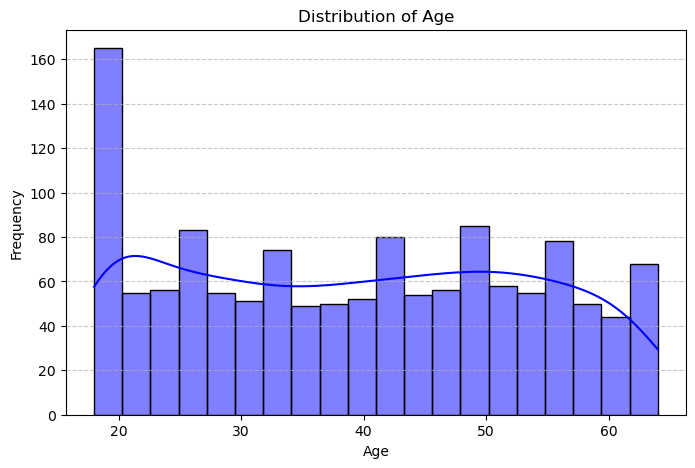

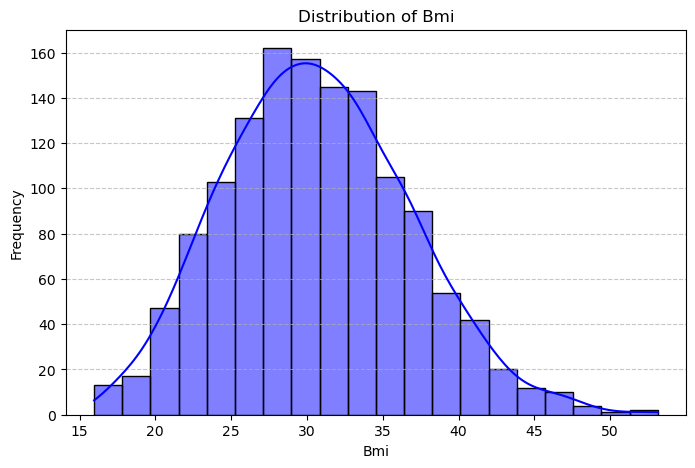

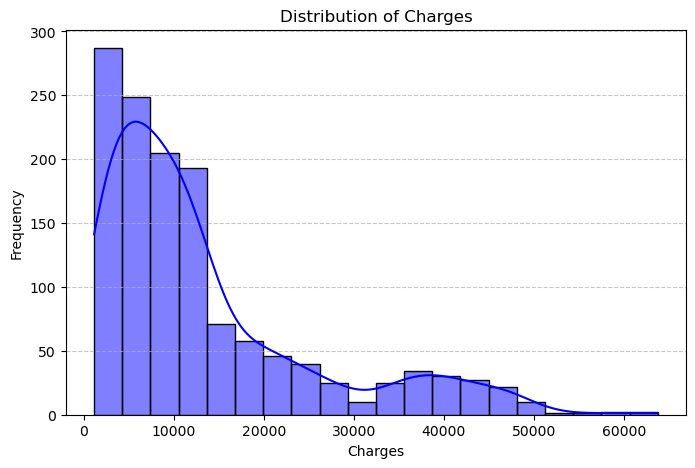

In [399]:
# definning the numerical columns to visualize
numerical_columns = ['age', 'bmi', 'charges']

# Creating histograms for each column
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=20, color='blue')
    plt.title(f'Distribution of {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


### Insights from Feature Distributions from numerical features
#### `age`:
- Distribution is fairly uniform across most age groups. But there is a notable peak in the early 20s.
- This suggests a larger representation of younger individuals in the dataset.

#### `bmi`:
- BMI follows a normal distribution centered around 30 (overweight category).
- Outliers with high BMI values (>45) are observed. This may require special attention during analysis.

#### `charges`:
- Medical charges are highly skewed to the right. Further, most charges below `$20,000`.
- The extreme values like those above `$40000` could indicate high-risk individuals (e.g., smokers or individuals with severe health issues).)es.

#### General Implication:
- The distributions for age, bmi, and charges highlight potential areas for preprocessing:
  - Addressing outliers in `bmi` and `charges`.
  - Considering a log transformation for `charges` to reduce skewnes. 

### Visualisation of categorical features

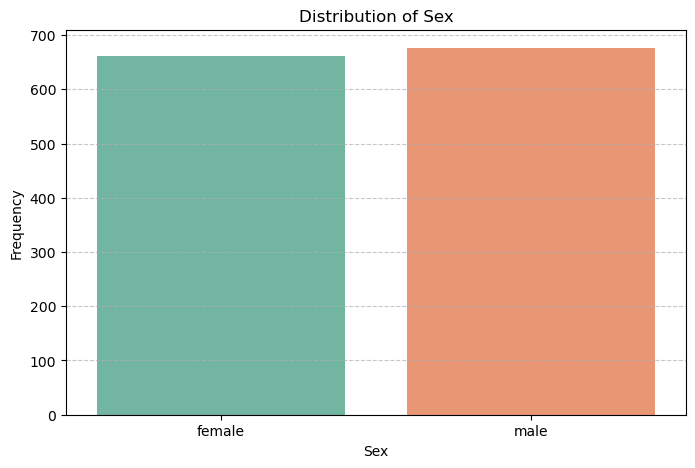

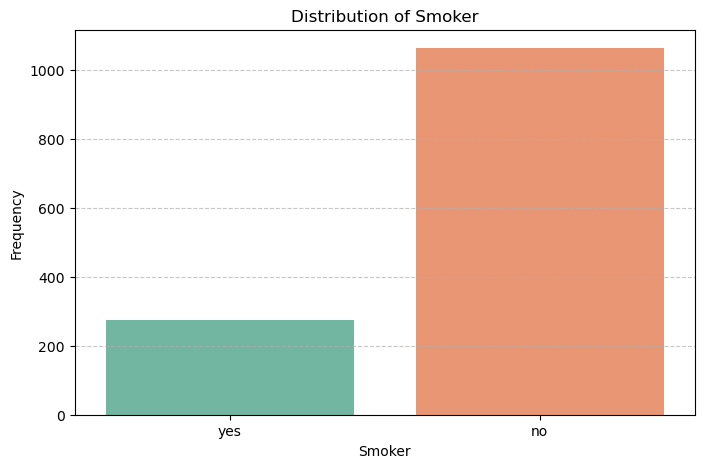

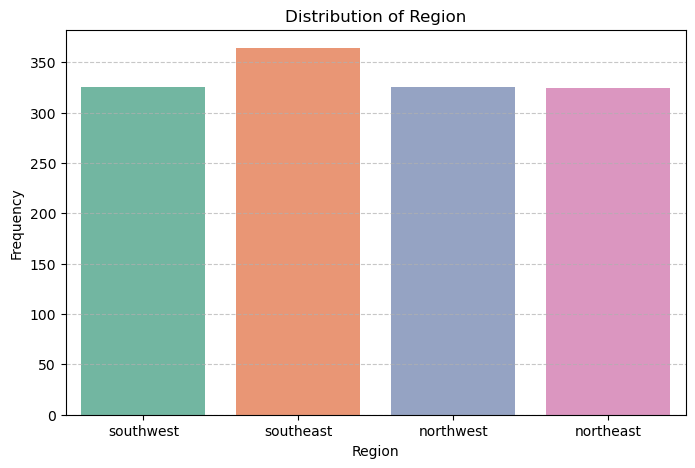

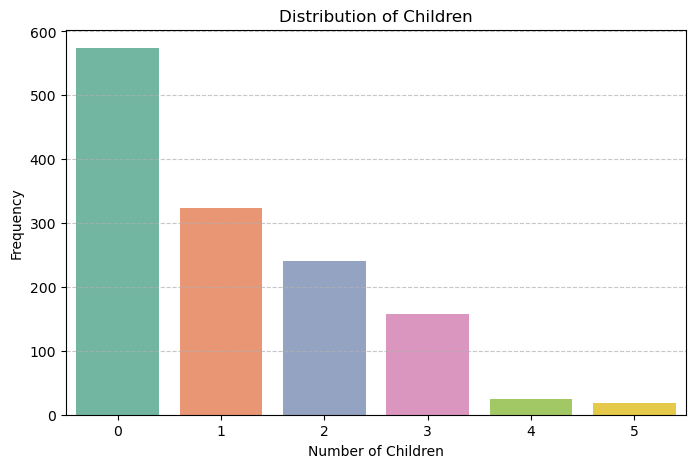

In [405]:
# List of categorical columns
categorical_columns = ['sex', 'smoker', 'region']

# Looping through each column and plot
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=df, palette='Set2')
    plt.title(f'Distribution of {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


# Plotting distribution of 'children'
plt.figure(figsize=(8, 5))
sns.countplot(x='children', data=df, palette='Set2', hue=None)  
plt.title('Distribution of Children')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Insights from Categorical Feature Distributions
#### `sex`:
- The dataset is evenly distributed between males and females.
- This balance reduces the likelihood of gender-related biases in upcoming model predictions.

#### `smoker`:
- The bar chart shows that approximately 20–25% of the individuals are smokers. The majority (~75–80%) are non-smokers.
- Since the smokers are underrepresented in the dataset, this imbalance can be challanging for models to generalize well for smokers.

#### `region`:
- The dataset is evenly distributed across the four regions. The Southeast slightly more represented and the Southwest slightly less.
- Therefore region-based analyses and predictions are reliable and free from major biases.


#### `children`:
-  **Most Common Group**: Households with no children (`children = 0`) dominate the dataset.
-  **Least Common Groups**: Households with 4 or 5 children are rare.
-  **Trend**: There is a clear decreasing trend in frequency as the number of children increases.

#### `Implications`:
  - Smoking status imbalance may require preprocessing adjustments (e.g., oversampling smokers or applying class weighting) to ensure fair model performance.
  - Balanced distributions for `sex` and `region` allow unbiased and reliable insights for gender- and region-based analyses.
  - The imbalance in `children` categories may influence model predictions, specially for larger families with 4 or 5 children.
  - Further analysis should be done to determine the relationship between the number of children and medical charges. 

### Scatterplots for Numerical Features vs. charges with smoking status

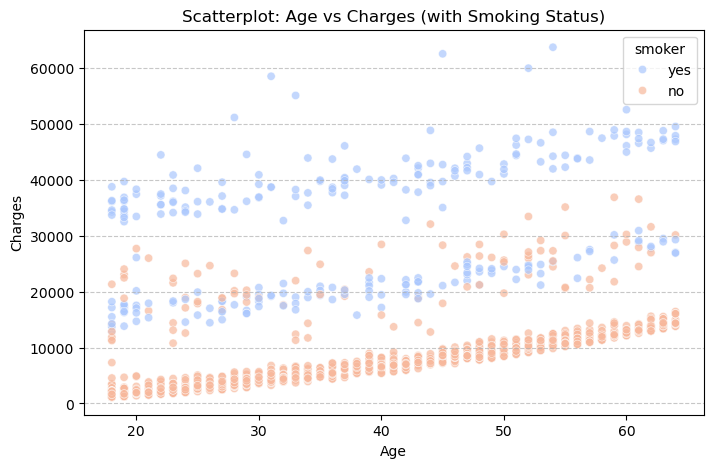

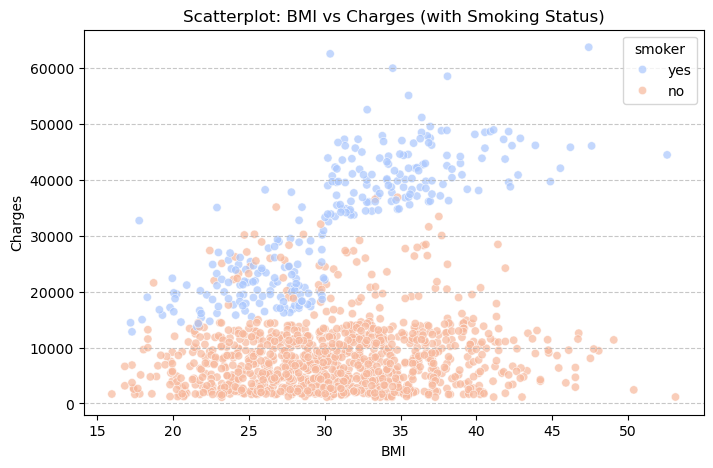

In [409]:
# Scatterplot: age vs charges
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='charges', data=df, hue='smoker', palette='coolwarm', alpha=0.7)
plt.title('Scatterplot: Age vs Charges (with Smoking Status)')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Scatterplot: bmi vs charges
plt.figure(figsize=(8, 5))
sns.scatterplot(x='bmi', y='charges', data=df, hue='smoker', palette='coolwarm', alpha=0.7)
plt.title('Scatterplot: BMI vs Charges (with Smoking Status)')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Scatterplots: Numerical Features vs. Charges

#### Age vs. Charges
- **Trend**: Medical charges generally increase with age.
- **Smokers vs. Non-Smokers**: Smokers incur significantly higher charges across all age groups. Also, it's noticibale that the gap widening for older individuals.
- **Outliers**: High-charge outliers are often common among older smokers.
- **Implications**:
  - Age is a meaningful predictor of charges.
  - Smoking status interacts strongly with age and significantly impacts charges.

#### BMI vs. Charges
- **Trend**: Higher BMI correlates with higher charges, especially for individuals classified as overweight or obese.
- **Smokers vs. Non-Smokers**: Smokers consistently have higher charges regardless of BMI, while non-smokers show stable, lower charges across all BMI ranges.
- **Clusters**: Clear clusters of smokers (high charges) and non-smokers (low charges) are visible.
- **Implications**:
  - BMI is a moderately strong predictor of charges.
  - Smoking status amplifies the effect of BMI on charges.
  - Combined analysis of `bmi`, `smoker`, and `charges` is critical.


In [412]:
### Enhancing above Scatterplots with Regression Lines

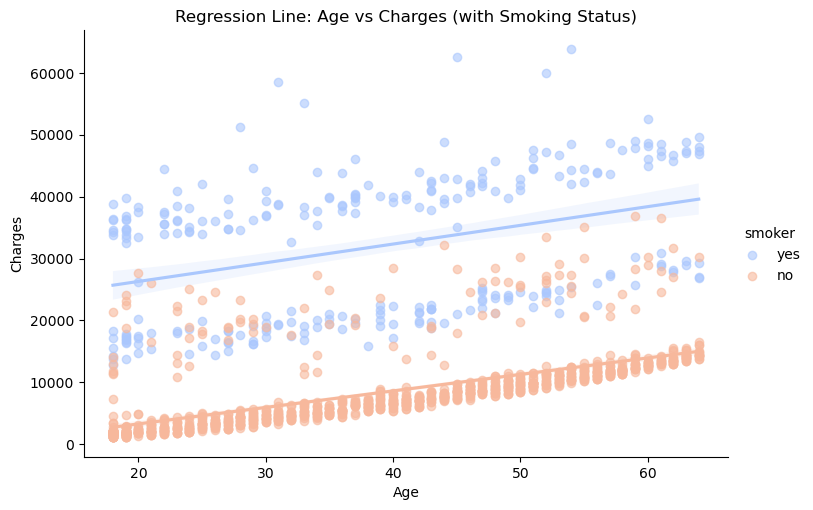

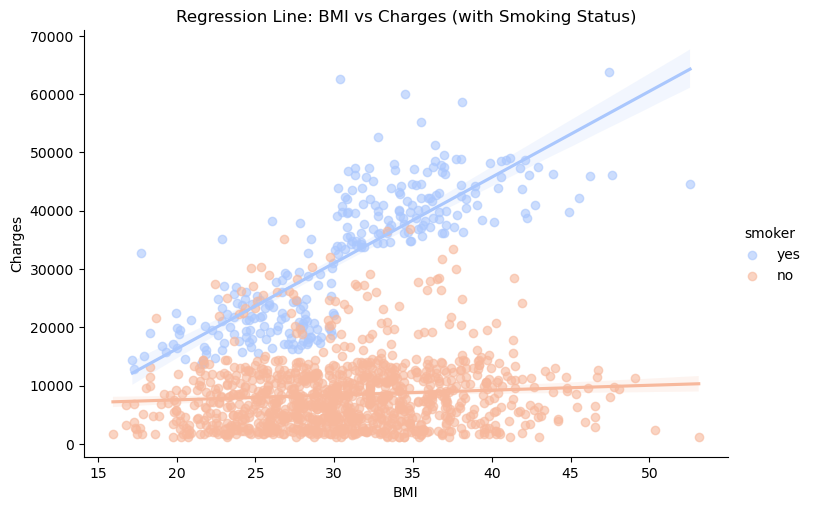

In [414]:
# Enhancing scatterplot with regression line: age vs charges
sns.lmplot(x='age', y='charges', data=df, hue='smoker', palette='coolwarm', height=5, aspect=1.5, scatter_kws={'alpha':0.6})
plt.title('Regression Line: Age vs Charges (with Smoking Status)')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

# Enhancing scatterplot with regression line: bmi vs charges
sns.lmplot(x='bmi', y='charges', data=df, hue='smoker', palette='coolwarm', height=5, aspect=1.5, scatter_kws={'alpha':0.6})
plt.title('Regression Line: BMI vs Charges (with Smoking Status)')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

### Enhanced Scatterplots: Regression Lines for Numerical Features vs. Charges

#### Age vs. Charges
- The regression line confirms a positive relationship between `age` and `charges`.
- It's clear that mokers have a steeper slope compared to non-smokers. This indicates that medical charges increase faster with age for smokers.
- This reinforces the impact of smoking on medical costs across different age groups.

#### BMI vs. Charges
- The regression lines reveal distinct trends for smokers and non-smokers:
  - **Smokers**: A strong positive correlation between `bmi` and `charges`. Higher BMI results in significantly higher charges for smokers.
  - **Non-smokers**: A nearly flat regression line, suggesting that BMI has little impact on charges for non-smokers.
- These findings highlight the combined influence of smoking and BMI on medical costs.


In [416]:
### children vs charges [Trend Analysis + Boxplot]

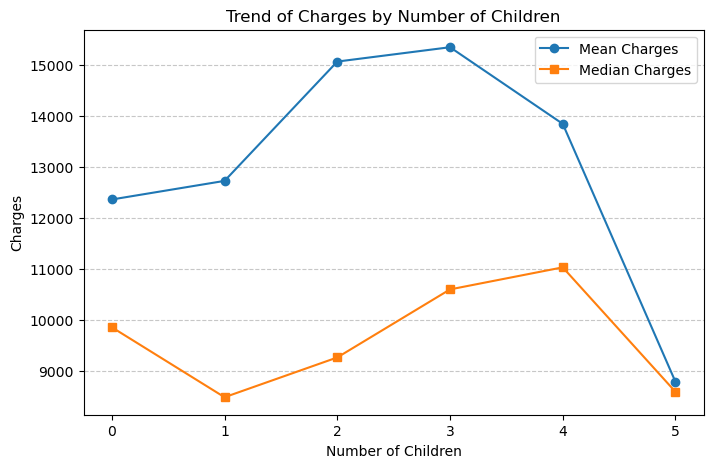

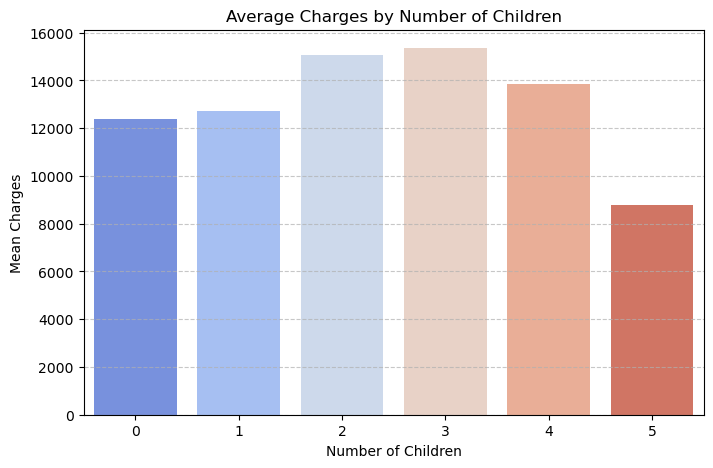

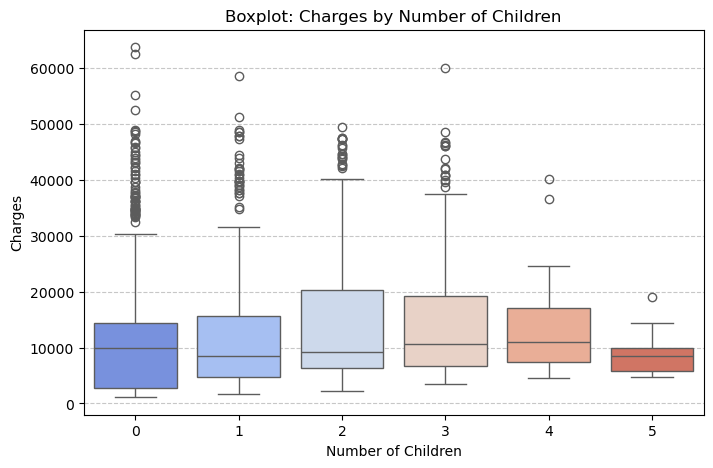

In [397]:
# Group data by 'children' and calculate mean and median charges
children_grouped = df.groupby('children')['charges'].agg(['mean', 'median']).reset_index()

# Line plot for mean and median charges by number of children
plt.figure(figsize=(8, 5))
plt.plot(children_grouped['children'], children_grouped['mean'], marker='o', label='Mean Charges')
plt.plot(children_grouped['children'], children_grouped['median'], marker='s', label='Median Charges')
plt.title('Trend of Charges by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Bar plot for mean charges by number of children
plt.figure(figsize=(8, 5))
sns.barplot(x='children', y='mean', data=children_grouped, palette='coolwarm')
plt.title('Average Charges by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Mean Charges')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Boxplot for variability of charges across children categories
plt.figure(figsize=(8, 5))
sns.boxplot(x='children', y='charges', data=df, palette='coolwarm')
plt.title('Boxplot: Charges by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Analysis of `children` vs. `Charges`

#### Key Observations
1. **Line Plot**:
   - **Mean Charges**:
     - Charges increase steadily from 0 to 3 children, peaking around 2–3 children.
     - A significant drop in mean charges is observed for families with 4 and 5 children.
   - **Median Charges**:
     - Median charges show smaller fluctuations but follow a similar decreasing trend for families with 5 children.
     - The gap between mean and median charges highlights the presence of high-cost outliers, especially in families with fewer children.

2. **Bar Plot**:
   - Reinforces the trend in mean charges, showing:
     - Highest average charges for families with 2–3 children.
     - Lowest average charges for families with 5 children.

3. **Box Plot**:
   - **Variability**:
     - The spread of charges is highest for 2–3 children, indicating more variability in healthcare costs.
     - Families with 5 children have the lowest spread and charges, suggesting lower overall healthcare costs.
   - **Outliers**:
     - Significant outliers (high charges) are visible across all groups but are more concentrated in smaller families (0–3 children).

#### Implications
- **Trend**:
  - Individuals with 0–3 children may prioritize their own healthcare, resulting in higher charges.
  - Charges decline sharply for families with 4–5 children, potentially indicating deprioritization of personal healthcare.
- **Modeling Insights**:
  - The relationship between `children` and `charges` is non-linear, making it important to consider interaction terms or group-based encoding for modeling.
  - The presence of outliers suggests the need for robust models or preprocessing steps like scaling or trimming.

#### Conclusion
- While `children` shows a weak but observable relationship with `charges`, its impact appears secondary compared to other features like `smoker` or `bmi`. Further evaluation via the correlation heatmap will confirm its significance in modeling.


# References

Fishman, P.A., Khan, Z.M., Thompson, E.E., and Curry, S.J. (2003) 'Health Care Costs among Smokers, Former Smokers, and Never Smokers in an HMO', *Health Services Research*, 38(2), pp. 733–749. Available from: [https://pmc.ncbi.nlm.nih.gov/articles/PMC1360912/](https://pmc.ncbi.nlm.nih.gov/articles/PMC1360912/) [Accessed 28 November 2024].